In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.isnull().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [ ]:
df.drop(['obj_ID', 'spec_obj_ID', 'run_ID','rerun_ID','field_ID'], axis= 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   cam_col   100000 non-null  int64  
 8   class     100000 non-null  object 
 9   redshift  100000 non-null  float64
 10  plate     100000 non-null  int64  
 11  MJD       100000 non-null  int64  
 12  fiber_ID  100000 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 9.9+ MB


In [ ]:
cat=[]
num=[]

In [ ]:
for i in df:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)

In [ ]:
cat

['class']

In [ ]:
num

['alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'cam_col',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

In [ ]:
def cat_analysis(col):
    df[col].value_counts()
    sns.countplot(x=df[col])
    plt.show()

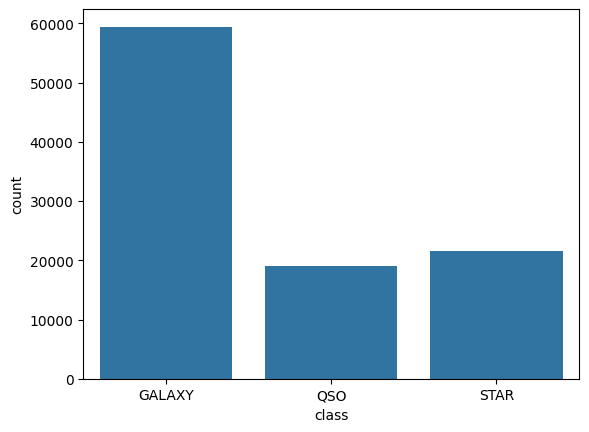

In [ ]:
for i in cat:
    cat_analysis(i)

In [ ]:
def outlier_detection_treatment(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= df[(df[col]<lf) | (df[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/df.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(6,4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()

Percentage of outliers in alpha 0.0


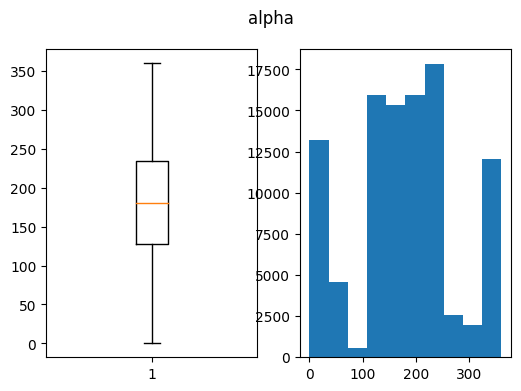

None
---------------------------------------------------------------------------------
Percentage of outliers in delta 0.0


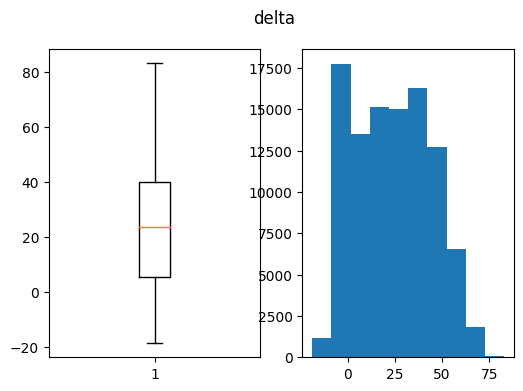

None
---------------------------------------------------------------------------------
Percentage of outliers in u 0.056


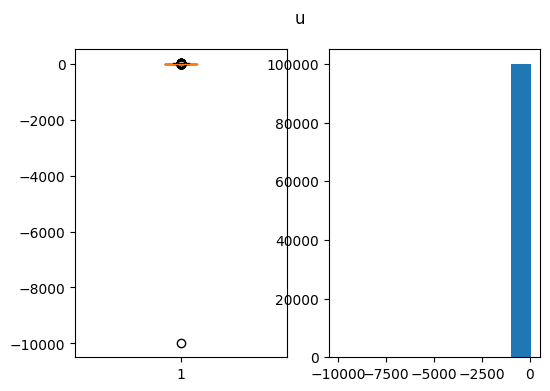

None
---------------------------------------------------------------------------------
Percentage of outliers in g 0.099


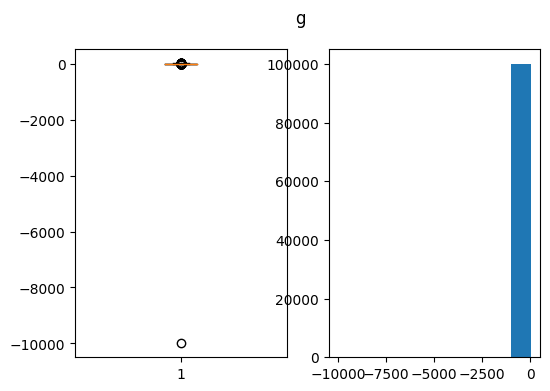

None
---------------------------------------------------------------------------------
Percentage of outliers in r 0.132


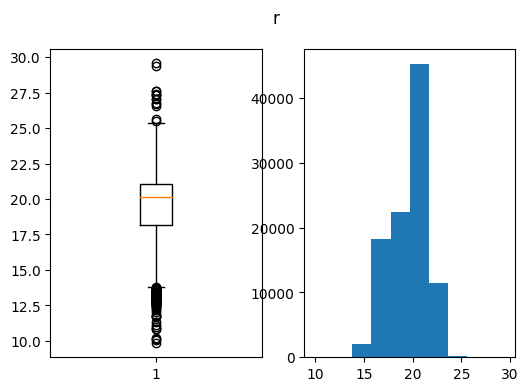

None
---------------------------------------------------------------------------------
Percentage of outliers in i 0.198


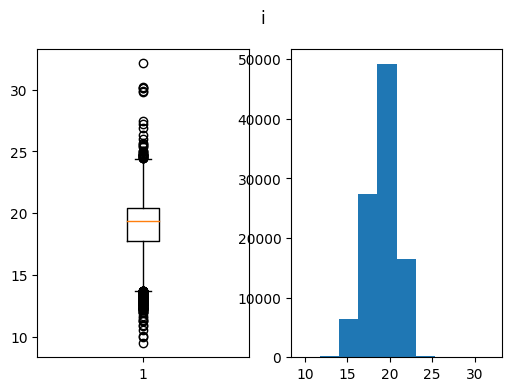

None
---------------------------------------------------------------------------------
Percentage of outliers in z 0.32


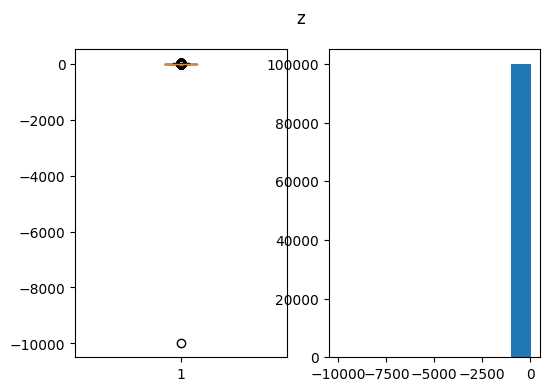

None
---------------------------------------------------------------------------------
Percentage of outliers in cam_col 0.0


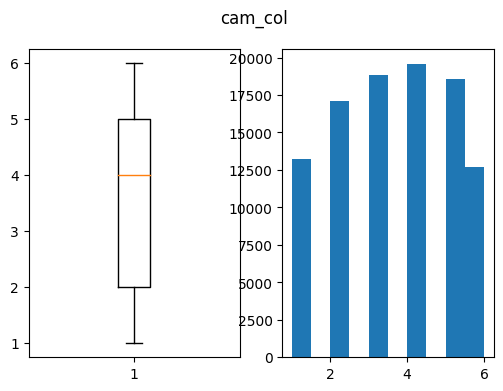

None
---------------------------------------------------------------------------------
Percentage of outliers in redshift 8.99


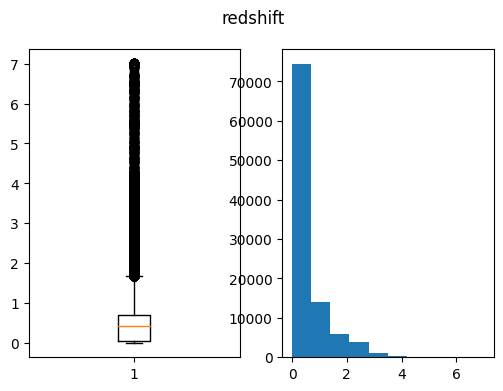

None
---------------------------------------------------------------------------------
Percentage of outliers in plate 0.0


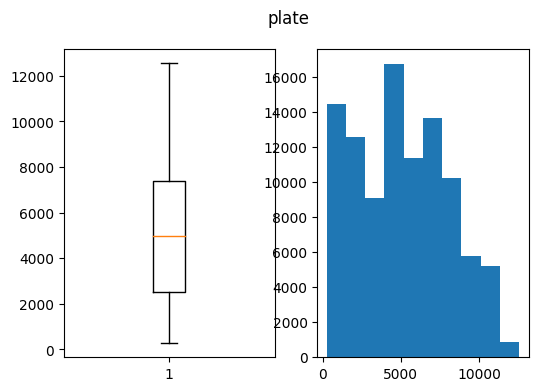

None
---------------------------------------------------------------------------------
Percentage of outliers in MJD 0.0


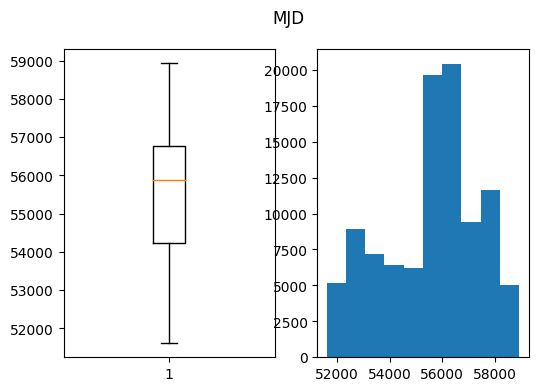

<ipython-input-63-c8b5040a06ae>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '55868.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()


None
---------------------------------------------------------------------------------
Percentage of outliers in fiber_ID 0.0


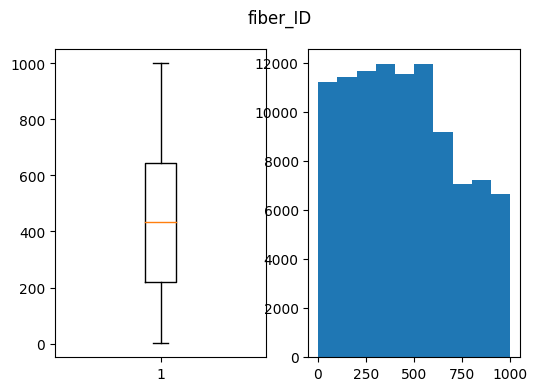

None
---------------------------------------------------------------------------------


In [ ]:
for col in num:
    print(outlier_detection_treatment(col))
    print("---------------------------------------------------------------------------------")

In [ ]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

<Axes: >

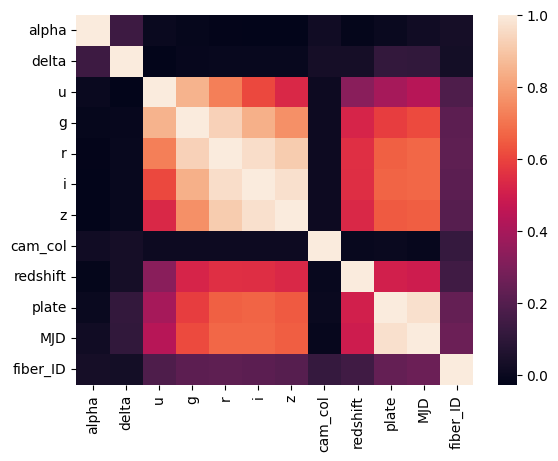

In [ ]:
sns.heatmap(df.loc[:, num].corr())

In [ ]:
df['class'].replace(to_replace=['GALAXY','QSO','STAR'],
                       value=[2,1,0], inplace=True)

In [ ]:
df.drop(['r','z','g','MJD'], axis=1, inplace=True)

In [ ]:
cat=[]
num=[]

In [ ]:
for i in df:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)

<Axes: >

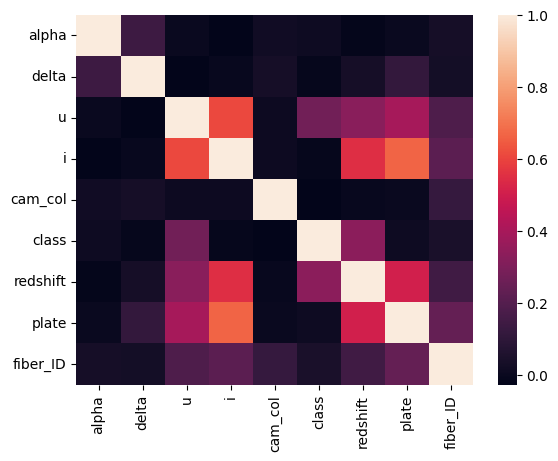

In [ ]:
sns.heatmap(df.loc[:, num].corr())

In [ ]:
X= df.drop(['class'], axis= 1)
y= df['class']

In [ ]:
X= X.values
y= y.values

In [ ]:
X.shape

(100000, 8)

In [ ]:
y.shape

(100000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state= 0)

In [ ]:
X_train.shape

(70000, 8)

In [ ]:
y_train.shape

(70000,)

In [ ]:
X_test.shape

(30000, 8)

In [ ]:
y_test.shape

(30000,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt= DecisionTreeClassifier(max_depth=10)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred_train= dt.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [ ]:
print(accuracy_score(y_train, y_pred_train))

0.9806142857142857


In [ ]:
print(precision_score(y_train, y_pred_train, average='weighted'))

0.9805511122477303


In [ ]:
y_pred_test= dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_test))

0.9704


In [ ]:
print(precision_score(y_test, y_pred_test, average='weighted'))

0.9702183766556639


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(max_depth=10)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
rf_train_pred= rf.predict(X_train)

In [ ]:
accuracy_score(y_train,rf_train_pred )

0.9729714285714286

In [ ]:
print(precision_score(y_train, rf_train_pred, average='weighted'))

0.972803715750262


In [ ]:
rf_test_pred= rf.predict(X_test)

In [ ]:
accuracy_score(y_test,rf_test_pred )

0.9659333333333333

In [ ]:
print(precision_score(y_test, rf_test_pred, average='weighted'))

0.9656357849010774
